In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense #all nodes are connected
from keras.optimizers import Adam
%matplotlib inline

Using TensorFlow backend.


### Functions

In [3]:
def getRandomSamples(mu1, sigma1, mu2, sigma2, numPoints,randSeed=0):
    """Returns a numpy array of random points in the form [[x0,y0], [x1,y1], ...]"""
    if(randSeed >= 0):
        np.random.seed(randSeed)
    xRV = np.random.normal(mu1, sigma1, numPoints) #mu, sigma
    yRV = np.random.normal(mu2, sigma2, numPoints) #mu, sigma
    samples = np.array([xRV, yRV]).T
    return samples

def plotDecisionBoundary(X,y, mdl):
    """
    Creates a contour plot of a mesh grid
    https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html
    https://www.python-course.eu/matplotlib_contour_plot.php
    """
    xSpan = np.linspace(min(X[:,0])-1, max(X[:,0])+1)
    ySpan = np.linspace(min(X[:,1])-1, max(X[:,0])+1)
    xx,yy = np.meshgrid(xSpan, ySpan)
    _xx,_yy = xx.ravel(), yy.ravel()
    grid = np.c_[_xx,_yy]
    pred = model.predict(grid)
    z = pred.reshape(xx.shape)
    plt.contourf(xx,yy,z)

### Generate random points

In [4]:
numPoints = 500
X1 = getRandomSamples(13,2,12,2,numPoints)
X2 = getRandomSamples(8,2,6,2,numPoints)
X = np.vstack((X1,X2))
y = np.matrix(np.append(np.zeros(numPoints), np.ones(numPoints))).T

### Plot Points

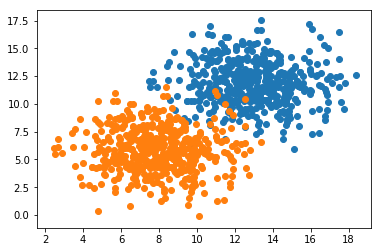

In [5]:
plt.scatter(X[:numPoints,0], X[:numPoints,1])
plt.scatter(X[numPoints:,0], X[numPoints:,1])

### Create keras perceptron model with Adam optimizer
- https://keras.io/models/sequential/
- https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
- Adam optimizer uses stochastic gradient descent (adagrad, rmsprop), computes adaptive learning rates for each parameter
- binary cross entropy for binary case, categorical cross entropy for > 2 classes
- batch size depends on size of data, number of samples, and memory
- shuffle prevent overfitting by shuffling rows of training data and not using all the training data at once

In [6]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr=0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])

### Fit the model

In [7]:
hist = model.fit(x=X, y=y, batch_size=50, epochs=50, shuffle='true', verbose=0)

### Plot the accuracy and loss

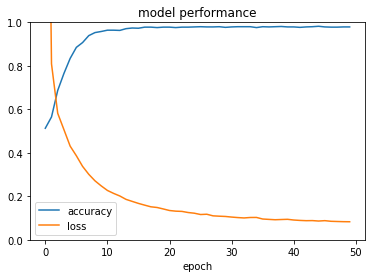

In [8]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
axes = plt.gca()
axes.set_ylim([0,1]) 
plt.title("model performance")
plt.xlabel("epoch")
plt.legend(["accuracy", 'loss'])
plt.show()

- np.c_ is column stack https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.c_.html 

### Make predictions on the grid

In [9]:
class0 = np.array([[7.5, 5.1]])
pred1 = round(model.predict(class0)[0][0], 2)
class1 = np.array([[12.5, 13.1]])
pred2 = round(model.predict(class1)[0][0], 2)
classQ = np.array([[10, 8.8]])
predQ = round(model.predict(classQ)[0][0], 2)
print(pred1)
print(pred2)
print(predQ)

0.99
0.0
0.5


### Plot the decision boundary

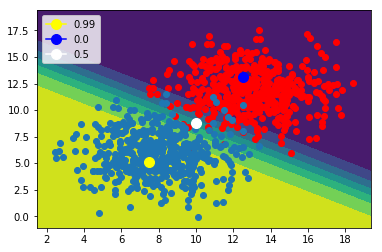

In [10]:
plotDecisionBoundary(X,y,model)
plt.scatter(X[:numPoints,0], X[:numPoints,1])
plt.scatter(X[numPoints:,0], X[numPoints:,1])
plt.plot(class0[0,0], class0[0,1], marker="o", markersize=10, color='yellow', label=pred1)
plt.plot(class1[0,0], class1[0,1], marker="o", markersize=10, color='blue', label=pred2)
plt.plot(classQ[0,0], classQ[0,1], marker="o", markersize=10, color='white', label=predQ)
plt.legend()